In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2

2022-11-18 12:24:32.054211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 12:24:32.156043: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 12:24:32.557553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/lib/:/usr/lib/x86_64-linux-gnu//usr/local/cuda/lib64/:/usr/local/cuda-11.7/lib64/::/usr/lib/:/usr/lib/x86_64-linux-gnu//usr/local/cuda/lib64/:/usr/local/cuda-11.7/lib64/::/home/sam/miniconda3/lib/:/home/sam

In [2]:
tf.config.list_physical_devices('GPU')

2022-11-18 12:24:33.109298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 12:24:33.196238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 12:24:33.196405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
transactions = pd.read_csv("data/transactions_train.csv")
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
articles = pd.read_csv("data/articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
customer_0 = transactions.iloc[0]['customer_id']
article_ids = transactions.loc[transactions['customer_id'] == customer_0]['article_id'].to_numpy()

columns = ['product_type_name','product_type_no','product_group_name','colour_group_code', 'colour_group_name']

articles.loc[articles['article_id'].isin(article_ids)].loc[:,columns]

,product_type_name,product_type_no,product_group_name,colour_group_code,colour_group_name
1469,Swimwear bottom,59,Swimwear,9,Black
10520,Bra,306,Underwear,51,Light Pink
18197,Blouse,258,Garment Upper body,71,Light Blue
40179,Underwear body,283,Underwear,9,Black
59458,Bikini top,298,Swimwear,9,Black
60253,Sweater,252,Garment Upper body,9,Black
60259,Sweater,252,Garment Upper body,7,Grey
67274,Trousers,272,Garment Lower body,71,Light Blue
78503,Jacket,262,Garment Upper body,15,Greyish Beige
91841,Skirt,275,Garment Lower body,13,Beige


In [6]:
unique_types = np.unique(articles['product_type_no'].to_numpy())
print(unique_types)
print(f"# of unique types: {len(unique_types)}")

[ -1  49  57  59  60  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  98 100 102 144 155 156 161 196 230 231 245 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 267 268 270 271 272 273 274 275 276 277 283
 284 285 286 287 288 289 291 293 295 296 297 298 299 300 302 303 304 305
 306 307 308 326 349 351 366 389 464 465 467 468 470 475 476 477 483 489
 491 492 493 494 495 496 498 499 503 504 508 509 510 511 512 514 515 521
 523 525 529 532 761 762]
# of unique types: 132


In [7]:
unique_colors = np.unique(articles['colour_group_code'].to_numpy())
print(unique_colors)
print(f"# of unique colors: {len(unique_colors)}")

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19 20 21 22 23 30 31
 32 33 40 41 42 43 50 51 52 53 60 61 62 63 70 71 72 73 80 81 82 83 90 91
 92 93]
# of unique colors: 50


In [8]:
type_dict = {}
for idx, val in enumerate(unique_types):
    type_dict[val] = idx
    
color_dict = {}
for idx, val in enumerate(unique_colors):
    color_dict[val] = idx

In [9]:
from typing import Tuple, List

In [10]:
def get_feature_vector_for_user(userid:int, type_dict:dict, color_dict:dict) -> List[Tuple[np.ndarray,np.ndarray]]:
    article_ids = transactions.loc[transactions['customer_id'] == userid]['article_id'].to_numpy()
    
    columns = ['product_type_no','colour_group_code']
    user_purchases = articles.loc[articles['article_id'].isin(article_ids)].loc[:,columns]
    
    feature_vector = []
    for idx, purchase in user_purchases.iterrows():
        type_onehot  = type_dict[purchase['product_type_no']]
        color_onehot = color_dict[purchase['colour_group_code']]
        
        feature  = np.zeros(len(type_dict)+len(color_dict))
        feature[type_onehot] = 1.0
        feature[color_onehot+len(type_dict)] = 1.0
        
        feature_vector.append(feature)
        
    feature_vector = np.stack(feature_vector)
    return feature_vector
#     print(feature_vector)

In [11]:
print(get_feature_vector_for_user(customer_0, type_dict, color_dict))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [230]:
unique_users = np.unique(transactions['customer_id'].to_numpy())

In [13]:
from tqdm import tqdm

In [231]:
N = 200
all_user_feature_vectors = []
training_users = np.random.choice(unique_users.shape[0], N, replace=False)
for user in tqdm(unique_users[training_users]):
    feature_vector = get_feature_vector_for_user(user, type_dict, color_dict)
    all_user_feature_vectors.append(feature_vector)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:03<00:00,  1.22s/it]


In [38]:
def get_model(input_width:int, output_width:int, lr:float=0.01) -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(input_width, activation='relu', input_shape=(input_width,)),
        tf.keras.layers.Dense(2*input_width, activation='relu'),
        tf.keras.layers.Dense(2*input_width, activation='relu'),
        tf.keras.layers.Dense(output_width, activation='softmax'),
    ])
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

In [327]:
def get_data_permutations(all_user_feature_vectors) -> Tuple[np.ndarray,np.ndarray]:
    inputs  = []
    outputs = []
    for user in all_user_feature_vectors:
        if len(user) < 3:
            continue
        for i, input_feature in enumerate(user[:-1]):
            for j, output_feature in enumerate(user):
                if i == j:
                    continue
                inputs.append(np.concatenate([input_feature,user[i+1]]))
                outputs.append(output_feature)
    inputs = np.stack(inputs)
    outputs = np.stack(outputs)
    return inputs, outputs

In [328]:
inputs, outputs = get_data_permutations(all_user_feature_vectors)
print(np.shape(inputs))
print(np.shape(outputs))

(415008, 364)
(415008, 182)


In [239]:
epochs     = 10
lr         = 0.05
batch_size = 32

In [329]:
color_model = get_model(input_width=2*(len(unique_types)+len(unique_colors)), output_width=len(unique_colors), lr=lr)
type_model  = get_model(input_width=2*(len(unique_types)+len(unique_colors)), output_width=len(unique_types),  lr=lr)

In [330]:
color_model.summary()
type_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 364)               132860    
                                                                 
 dense_65 (Dense)            (None, 728)               265720    
                                                                 
 dense_66 (Dense)            (None, 728)               530712    
                                                                 
 dense_67 (Dense)            (None, 50)                36450     
                                                                 
Total params: 965,742
Trainable params: 965,742
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)       

In [331]:
np.shape(outputs[:,len(unique_types):])

(415008, 50)

In [332]:
color_model.fit(inputs,outputs[:,len(unique_types):],epochs=epochs,batch_size=batch_size)

Epoch 1/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.7456 - acc: 0.3288
Epoch 2/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.7041 - acc: 0.3289
Epoch 3/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.6889 - acc: 0.3290
Epoch 4/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.6767 - acc: 0.3291
Epoch 5/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.6661 - acc: 0.3292
Epoch 6/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.6568 - acc: 0.3294
Epoch 7/10
12969/12969 [==============================] - 20s 2ms/step - loss: 2.6475 - acc: 0.3298
Epoch 8/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.6393 - acc: 0.3299
Epoch 9/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.6318 - acc: 0.3302
Epoch 10/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.6251 - acc: 0.3302

In [333]:
np.shape(outputs[:,:len(unique_types)])

(415008, 132)

In [334]:
history = type_model.fit(inputs,outputs[:,:len(unique_types)],epochs=epochs)

Epoch 1/10
12969/12969 [==============================] - 22s 2ms/step - loss: 3.1702 - acc: 0.1719
Epoch 2/10
12969/12969 [==============================] - 22s 2ms/step - loss: 3.0865 - acc: 0.1791
Epoch 3/10
12969/12969 [==============================] - 20s 2ms/step - loss: 3.0392 - acc: 0.1846
Epoch 4/10
12969/12969 [==============================] - 21s 2ms/step - loss: 3.0042 - acc: 0.1881
Epoch 5/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.9778 - acc: 0.1915
Epoch 6/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.9580 - acc: 0.1936
Epoch 7/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.9420 - acc: 0.1958
Epoch 8/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.9286 - acc: 0.1974
Epoch 9/10
12969/12969 [==============================] - 21s 2ms/step - loss: 2.9169 - acc: 0.1988
Epoch 10/10
12969/12969 [==============================] - 22s 2ms/step - loss: 2.9068 - acc: 0.1998

In [46]:
import matplotlib.pyplot as plt

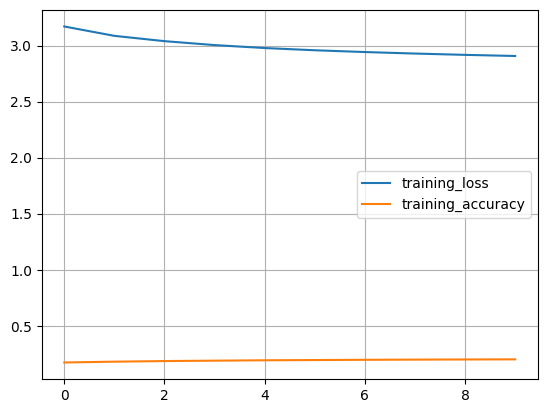

In [335]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['acc'], label = 'training_accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [336]:
type_model.save_weights('weights/type/type_prediction.weights')
color_model.save_weights('weights/color/color_prediction.weights')

In [411]:
N = 50
test_user_feature_vectors = []
testing_users = np.random.choice(unique_users.shape[0], N, replace=False)
for user in tqdm(unique_users[testing_users]):
    feature_vector = get_feature_vector_for_user(user, type_dict, color_dict)
    test_user_feature_vectors.append(feature_vector)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:52<00:00,  1.06s/it]


In [412]:
test_inputs, test_outputs = get_data_permutations(test_user_feature_vectors)

In [413]:
print(np.shape(test_inputs))

(193934, 364)


In [414]:
predicted_colors = color_model.predict(test_inputs)
predicted_types  = type_model.predict(test_inputs)

6061/6061 [==============================] - 4s 658us/step


In [415]:
colors_predicted = np.argmax(predicted_colors,axis=-1)
colors_actual = np.argmax(test_outputs[:,len(unique_types):],axis=-1)

_, false_true = np.unique(colors_predicted==colors_actual,return_counts=True)

accuracy = false_true[-1] / len(test_outputs)
print(f"color accuracy: {round(accuracy,4)*100}%")

color accuracy: 41.46%


In [416]:
types_predicted = np.argmax(predicted_types,axis=-1)
types_actual = np.argmax(test_outputs[:,:len(unique_types)],axis=-1)

_, false_true = np.unique(types_predicted==types_actual,return_counts=True)

accuracy = false_true[-1] / len(test_outputs)
print(f"type accuracy: {round(accuracy,4)*100}%")

type accuracy: 11.1%


In [96]:
article_dict = {
    'label':[],
    'code':[],
    'oh':[],
}
for article_type, onehot in type_dict.items():
#     print(article_type)
    article_dict['label'].append(articles.loc[articles['product_type_no']==article_type]['product_type_name'].iloc[0])
    article_dict['code'].append(article_type)
    article_dict['oh'].append(onehot)
    
article_df = pd.DataFrame(article_dict)
print(article_df)
article_df.to_csv("data/article_dict.csv")

               label  code   oh
0            Unknown    -1    0
1      Sleeping sack    49    1
2           Swimsuit    57    2
3    Swimwear bottom    59    3
4       Swimwear top    60    4
..               ...   ...  ...
127         Keychain   525  127
128      Mobile case   529  128
129         Umbrella   532  129
130       Marker pen   761  130
131      Zipper head   762  131

[132 rows x 3 columns]


In [97]:
colors_dict = {
    'label':[],
    'code':[],
    'oh':[],
}
for color_type, onehot in color_dict.items():
    colors_dict['label'].append(articles.loc[articles['colour_group_code']==color_type]['colour_group_name'].iloc[0])
    colors_dict['code'].append(color_type)
    colors_dict['oh'].append(onehot)
    
color_df = pd.DataFrame(colors_dict)
print(color_df)
color_df.to_csv("data/colors_dict.csv")

              label  code  oh
0           Unknown    -1   0
1             Other     1   1
2       Transparent     2   2
3            Silver     3   3
4     Bronze/Copper     4   4
5              Gold     5   5
6        Light Grey     6   6
7              Grey     7   7
8         Dark Grey     8   8
9             Black     9   9
10            White    10  10
11        Off White    11  11
12      Light Beige    12  12
13            Beige    13  13
14       Dark Beige    14  14
15    Greyish Beige    15  15
16  Yellowish Brown    17  16
17   Greenish Khaki    19  17
18     Other Yellow    20  18
19     Light Yellow    21  19
20           Yellow    22  20
21      Dark Yellow    23  21
22     Other Orange    30  22
23     Light Orange    31  23
24           Orange    32  24
25      Dark Orange    33  25
26        Other Red    40  26
27        Light Red    41  27
28              Red    42  28
29         Dark Red    43  29
30       Other Pink    50  30
31       Light Pink    51  31
32        

In [364]:
def do_inference(
    item_type:Tuple[str,str],
    item_color:Tuple[str,str],
    type_df:pd.DataFrame,
    color_df:pd.DataFrame,
    type_model:tf.keras.Model,
    color_model:tf.keras.Model
) -> Tuple[str,str]:

    num_type_categories  = 132
    num_color_categories = 50
    
    type_idx  = type_df.loc[type_df['label'].isin(item_type)]['oh'].values
    color_idx = color_df.loc[color_df['label'].isin(item_color)]['oh'].values
    
    input_vector = np.zeros((1,2*(num_type_categories+num_color_categories)))
    input_vector[0][type_idx[0]] = 1.0
    input_vector[0][num_type_categories+color_idx[0]] = 1.0
    input_vector[0][num_type_categories+num_color_categories+type_idx[1]] = 1.0
    input_vector[0][(2*num_type_categories)+num_color_categories+color_idx[1]] = 1.0
    
    type_prediction  = type_model.predict(input_vector,verbose=0)
    color_prediction = color_model.predict(input_vector,verbose=0)
    
    unsorted_top_types  = np.argpartition(type_prediction, -4)[0][-4:]
    unsorted_top_colors = np.argpartition(color_prediction, -4)[0][-4:]
    
    top_types  = unsorted_top_types[np.argsort(type_prediction[0,unsorted_top_types])]
    top_colors = unsorted_top_colors[np.argsort(color_prediction[0,unsorted_top_colors])]
    
    type_lookup  = type_df.loc[type_df['oh'].isin(top_types)]['label'].values
    color_lookup = color_df.loc[color_df['oh'].isin(top_colors)]['label'].values
    
    return type_lookup, color_lookup

In [383]:
from math import floor

Generating predictions for a user that likes Unknown Bag, and Orange Hair string
       article_id  product_code prod_name  product_type_no product_type_name  \
21505   594534003        594534   Killian              253          Vest top   

       product_group_name  graphical_appearance_no graphical_appearance_name  \
21505  Garment Upper body                  1010011                  Metallic   

       colour_group_code colour_group_name  ...  department_name index_code  \
21505                  5              Gold  ...     Jersey fancy          A   

       index_name index_group_no  index_group_name section_no  \
21505  Ladieswear              1        Ladieswear         15   

                     section_name garment_group_no  garment_group_name  \
21505  Womens Everyday Collection             1005        Jersey Fancy   

                                             detail_desc  
21505  Top in soft, lustrous jersey with spaghetti sh...  

[1 rows x 25 columns]
     article_id  

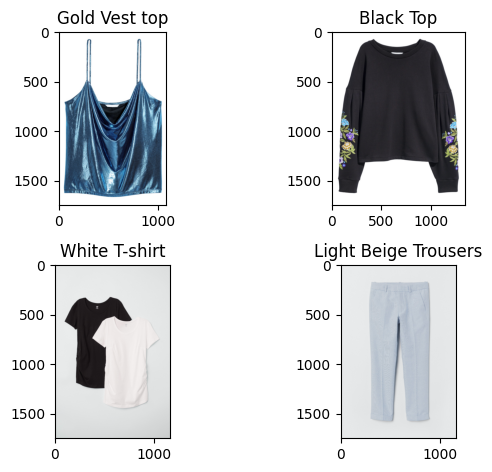

In [410]:
input_type  = [article_df.sample()['label'].values[0],article_df.sample()['label'].values[0]]
input_color = [color_df.sample()['label'].values[0],color_df.sample()['label'].values[0]]

type_rec, color_rec = do_inference(
    item_type=input_type,
    item_color=input_color,
    type_df=article_df,
    color_df=color_df,
    type_model=type_model,
    color_model=color_model)

print(f"Generating predictions for a user that likes {input_color[0]} {input_type[0]}, and {input_color[1]} {input_type[1]}")

f, axarr = plt.subplots(2,2)
for idx, color in enumerate(color_rec):
    example_articles = articles.loc[articles['product_type_name']==type_rec[idx]]
    example_articles = example_articles.loc[example_articles['colour_group_name']==color]
    print(example_articles.head())
    article_id = example_articles.sample()['article_id'].values[0]
    article_filename = f"data/images/{f'0{article_id}'[:3]}/{f'0{article_id}.jpg'}"
    try:
        image = cv2.imread(article_filename)
        x = floor(idx/2)
        y = idx%2
        axarr[x,y].imshow(image)
        axarr[x,y].title.set_text(f"{color} {type_rec[idx]}")
    except:
        print(f"Failed to open image: {article_filename}")
        pass
f.tight_layout(pad=1)
plt.show()